In [2]:
import tensorflow

In [3]:
tensorflow.__version__

'2.9.2'

In [4]:
!pip show tensorflow

Name: tensorflow
Version: 2.9.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: protobuf, six, tensorflow-io-gcs-filesystem, grpcio, keras, h5py, keras-preprocessing, absl-py, wrapt, termcolor, flatbuffers, opt-einsum, gast, libclang, google-pasta, astunparse, typing-extensions, tensorboard, setuptools, packaging, numpy, tensorflow-estimator
Required-by: kapre


# MNIST Daten vorbereiten

In [5]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [9]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

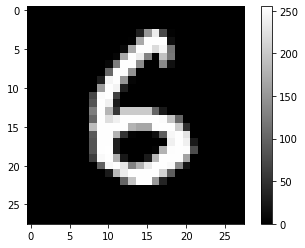

In [24]:
import matplotlib.pyplot as plt
plt.imshow( x_train[106,:,:], cmap="gray" )
plt.colorbar()
plt.show()

In [22]:
y_train[106]

6

# MNIST Daten in größere Bilder kopieren

In [26]:
60000*100*100

600000000

In [32]:
x,y = np.random.randint(low=0, high=100-28+1, size=2)

In [33]:
x

34

In [34]:
y

38

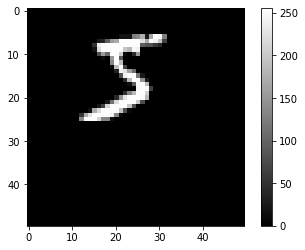

In [54]:
import numpy as np

N = 50
mnist_gross = np.zeros((60000,N,N))

for image_id in range(0,60000):
  x,y = np.random.randint(low=0, high=N-28+1, size=2)
  mnist_gross[image_id,x:x+28,y:y+28] = x_train[image_id,:,:]

import matplotlib.pyplot as plt
plt.imshow( mnist_gross[0], cmap="gray" )
plt.colorbar()
plt.show()

In [51]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [52]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)

In [53]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# Alles in einer Codezelle / Als Skript

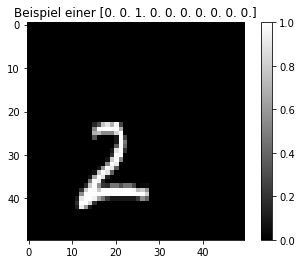

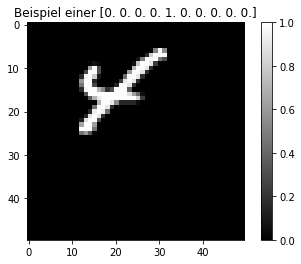

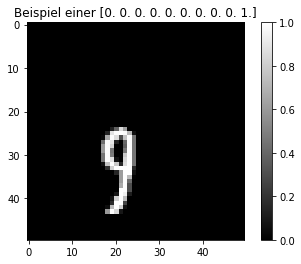

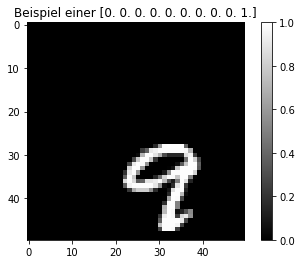

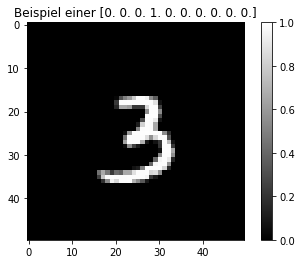

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 48, 48, 32)        320       
                                                                 
 P1 (MaxPooling2D)           (None, 24, 24, 32)        0         
                                                                 
 C2 (Conv2D)                 (None, 22, 22, 64)        18496     
                                                                 
 P2 (MaxPooling2D)           (None, 11, 11, 64)        0         
                                                                 
 C3 (Conv2D)                 (None, 9, 9, 128)         73856     
                                                                 
 P3 (MaxPooling2D)           (None, 4, 4, 128)         0         
                                                                 
 flatten (Flatten)           (None, 2048)             

In [3]:
# 1. MNIST Datensatz mit Bildgröße 28x28 laden
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# 2. MNIST Datensatz mit Größe NxN=50x50 erstellen
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
import numpy as np
N = 50
mnist_gross = np.zeros((60000,N,N))
for image_id in range(0,60000):
  x,y = np.random.randint(low=0, high=N-28+1, size=2)
  mnist_gross[image_id,x:x+28,y:y+28] = x_train[image_id,:,:]


# 3. Fünf zufällige Traininsbilder anzeigen
import matplotlib.pyplot as plt
for img_nr in range(0,5):
  img_id = np.random.randint(low=0, high=60000)
  plt.imshow( mnist_gross[img_id], cmap="gray" )
  label = y_train[img_id]
  plt.title( f"Beispiel einer {label}" )
  plt.colorbar()
  plt.show()


# 4. CNN zusammen bauen
input_shape = (N, N, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", name="C1"),
        keras.layers.MaxPooling2D(pool_size=(2, 2), name="P1"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", name="C2"),
        keras.layers.MaxPooling2D(pool_size=(2, 2), name="P2"),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu", name="C3"),
        keras.layers.MaxPooling2D(pool_size=(2, 2), name="P3"),
        keras.layers.Flatten(name="flatten"),
        keras.layers.Dense(num_classes, activation="softmax", name="FC1"),
    ]
)
model.summary()


# 5. CNN trainieren
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(mnist_gross, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

